## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


### Plotting function for confusion matrix

In [2]:
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y,y_predict)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land','land'])
    ax.yaxis.set_ticklabels(['did not land','land'])
    plt.show()
    

## Load the data

In [4]:
data_url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data_url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

In [5]:
data=pd.read_csv(data_url1)
X=pd.read_csv(data_url2)


In [6]:
print(data.head())
print(X.head(100))


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

## Task 1: Create a NumPy Array from the 'Class' Column

In [7]:
Y=data['Class'].to_numpy()

## Task 2: Standardize the Data

In [8]:
transform=preprocessing.StandardScaler()
X=transform.fit_transform(X)

## Task 3: Split the Data into Training and Test Sets

In [9]:
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(Y_test.shape)

(18,)


## Task 4: Logistic Regression with GridSearchCV

In [10]:
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)


Tuned hyperparameters (best parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8464285714285713


## Task 5: Evaluate Logistic Regression on Test Data

Test accuracy: 0.8333333333333334


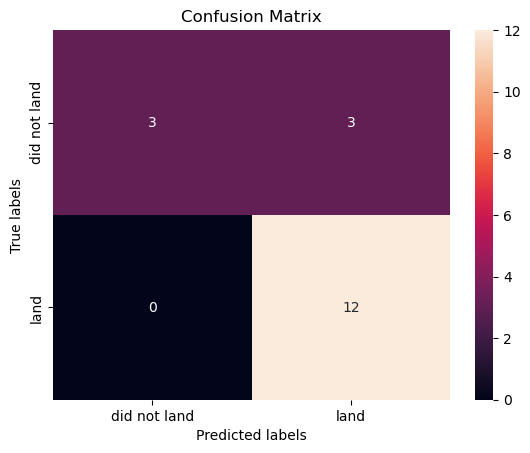

In [11]:
yhat = logreg_cv.predict(X_test)
print('Test accuracy:',logreg_cv.score(X_test,Y_test))
plot_confusion_matrix(Y_test,yhat)

## Task 5: Evaluate Logistic Regression on Test Data

Test accuracy 0.8333333333333334


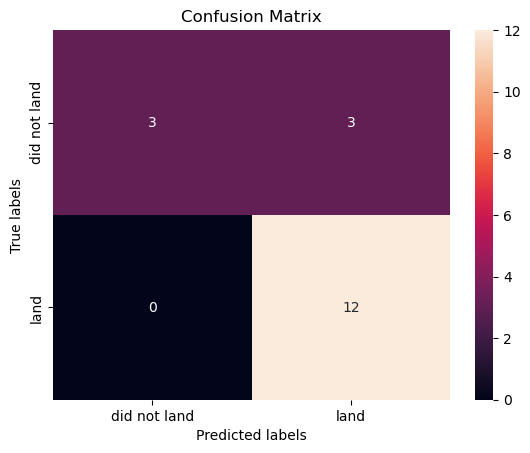

In [13]:
yhat= logreg_cv.predict(X_test)
print("Test accuracy",logreg_cv.score(X_test,Y_test))
plot_confusion_matrix(Y_test,yhat)

## Task 6: Support Vector Machine with GridSearchCV

In [20]:
parameters = {'kernel':('linear','rbf','poly','sigmoid'),
            'C':np.logspace(-3,3,5),
            'gamma':np.logspace(-3,3,5)}

svm=SVC()
svm_cv=GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,Y_train)

print("Tuned hyperparameters (best parameters):",svm_cv.best_params_)
print("Accuracy:",svm_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


## Task 7: Evaluate SVM on Test Data

Test accuracy: 0.8333333333333334


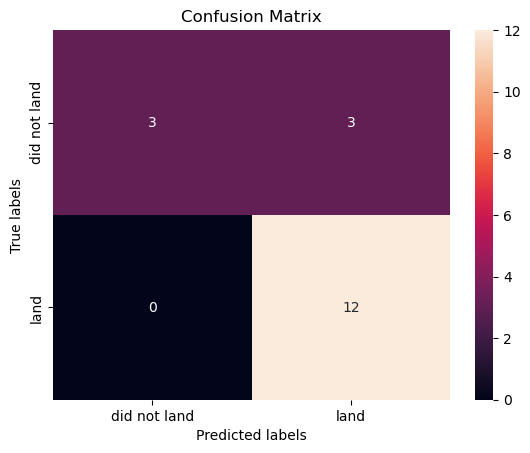

In [22]:
yhat= svm_cv.predict(X_test)
print("Test accuracy:",svm_cv.score(X_test,Y_test))
plot_confusion_matrix(Y_test,yhat)

## Task 8: Decision Tree Classifier with GridSearchCV

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree= DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)

print("Tuned hyperparameter (best parameters):",tree_cv.best_params_)
print("Accuracy:",tree_cv.best_score_)

Tuned hyperparameter (best parameters): {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.8892857142857142


D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

## Task 9: Evaluate Decision Tree on Test Data

Test accuracy: 0.8333333333333334


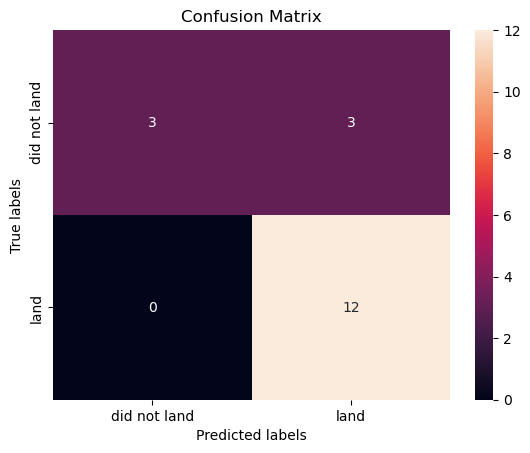

In [32]:
yhat=tree_cv.predict(X_test)
print("Test accuracy:",tree_cv.score(X_test,Y_test))
plot_confusion_matrix(Y_test,yhat)

## Task 10: K-Nearest Neighbors with GridSearchCV

In [34]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparamter (best parameters):",knn_cv.best_params_)
print('Accuracy',knn_cv.best_score_)

Tuned hyperparamter (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy 0.8482142857142858


## Task 11: Evaluate KNN on Test Data

Test accuracy:  0.8333333333333334


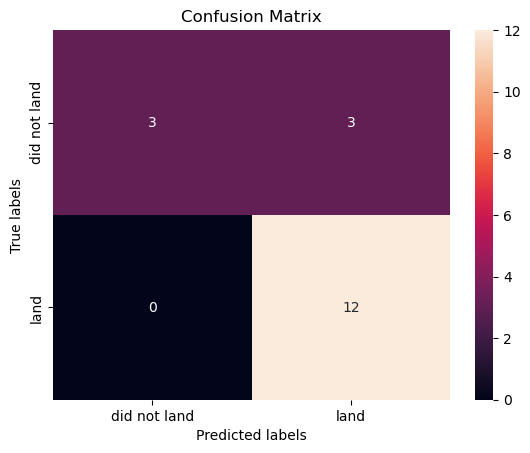

In [36]:
yhat = knn_cv.predict(X_test)
print("Test accuracy: ", knn_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)


## Task 12: Determine the Best Performing Method

In [39]:
logreg_test_accuracy = logreg_cv.score(X_test,Y_test)
svm_test_accuracy=svm_cv.score(X_test,Y_test)
tree_test_accuracy =tree_cv.score(X_test,Y_test)
knn_test_accuracy=knn_cv.score(X_test,Y_test)

print("Logistic Regression Test Accuracy:",logreg_test_accuracy)
print("SVM Test Accuracy:",knn_test_accuracy)

best_model_name=max([
    ("Logistic Regression", logreg_test_accuracy),
    ("SVM", svm_test_accuracy),
    ("Decision Tree", tree_test_accuracy),
    ("KNN", knn_test_accuracy)
], key=lambda x: x[1])[0]

print(f"The best performing method is: {best_model_name}")
    
    
    


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
The best performing method is: Logistic Regression
